# 24 Hours of Le Mans

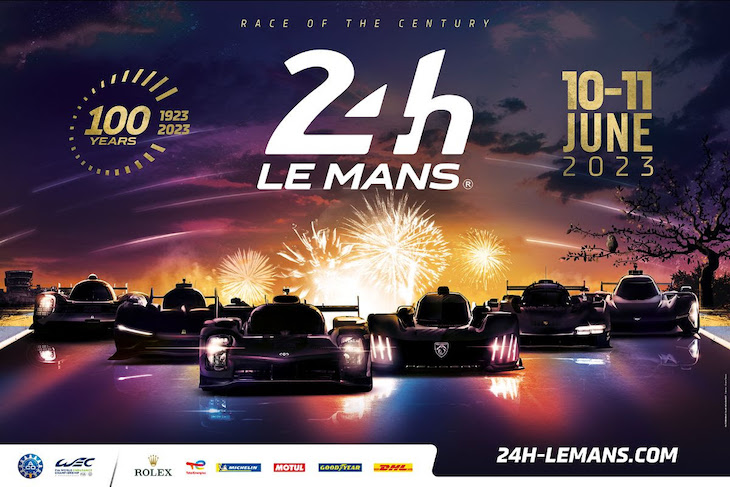


### Introduction

>The 24 Hours of Le Mans (French: 24 Heures du Mans) is an endurance-focused sports car race held annually near the town of Le Mans, France. It is widely considered to be one of the world's most prestigious races, and is one of the races—along with the Monaco Grand Prix and Indianapolis 500—that form the Triple Crown of Motorsport and is also one of the races alongside the 24 Hours of Daytona, and 12 Hours of Sebring that make up the informal Triple crown of endurance racing.Run since 1923, it is the oldest active endurance racing event in the world.

>Unlike fixed-distance races whose winner is determined by minimum time, the 24 Hours of Le Mans is won by the car that covers the greatest distance in 24 hours. The cars on this track are able to achieve speeds of 366 km/h (227 mph), and reached 407 km/h (253 mph) on the Mulsanne Straight in 1988 – instigating the addition of more chicanes to the track to reduce speed reached. Racing teams must balance the demands of speed with the cars' ability to run for 24 hours without mechanical failure. The race is organized by the Automobile Club de l'Ouest (ACO). It is held on the Circuit de la Sarthe, composed of closed public roads and dedicated sections of a racing track.

# About Dataset


#### Dataset - 24 Hours of Le Mans (2023) 💨
>Dataset link - (Hour-by-Hour Analysis of 24 Hours of Le Mans Cars 2023)
>https://www.kaggle.com/datasets/antimoni/24-hours-of-le-mans-2023

This dataset contains hour-by-hour data for the different cars that participated in the 2023 24 Hours of Le Mans. The data includes the car number, team, drivers, car name, category, tires, laps completed, total time, pitstops, best lap time, best lap number, best lap kph, and status (running or retired).


#### Data Feilds
1. Hour: The hour of the race
2. Car No: The car number
3. Team: The team that the car is racing for
4. Drivers: The drivers of the car
5. Car: The name of the car
6. Category: The class of the car
7. Tyres: The type of tires that the car is using
8. Laps: The number of laps that the car has completed
9. Total Time: The total time that the car has been running
10. Pitstops: The number of pitstops that the car has made
11. Best Lap Time: The fastest lap time that the car has set
12. Best Lap Number: The lap number on which the best lap time was set
13. Best Lap Kph: The best lap speed in kph
14. Status: Whether the car is running or retired

# Aim

>#### 1. Predicting : Total Time
>#### 2. Predicting : Best Lap Kph
>#### 3. Predicting : Best Lap Record


### Task : Regression

### Steps :
1. Import Libraries
2. Read Data
3. Data Cleaning
4. EDA : Exploratary Data Analysis
5. Visualization
6. Feature Engineering
7. Label Encodng
8. Splitting Target and Features
9. Train Test Splitting
10. Standardization
11. Training Model
12. Model Evaluation
13. Tunning
14. Predicting
15. Results

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Lets import the Le Mans Race data using pandas

le_man = pd.read_csv('C:/Users/Admin/Downloads/Hour_By_Hour_Race_Analysis.csv',encoding='latin-1')
le_man

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status
0,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,1:01:15,0,10.0,03:29.7,234.0,Running
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,1:01:19,0,12.0,03:29.1,234.6,Running
2,3,1,7,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ,Toyota GR010 HYBRID,HYPERCAR,M,12,1:01:21,0,12.0,03:30.0,233.6,Running
3,4,1,75,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY,Porsche 963,HYPERCAR,M,12,1:01:22,0,12.0,03:29.9,233.7,Running
4,5,1,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,12,1:01:23,0,9.0,03:30.0,233.6,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1482,24,60,Iron Lynx,C. SCHIAVONI / M. CRESSONI / A. PICARIELLO,Porsche 911 RSR - 19,LMGTE Am,M,28,2:20:55,2,8.0,03:51.4,212.0,Retired
1482,1483,24,16,Proton Competition,R. HARDWICK / Z. ROBICHON / J. HEYLEN,Porsche 911 RSR - 19,LMGTE Am,M,28,2:20:57,2,10.0,03:58.7,205.5,Retired
1483,1484,24,55,GMB Motorsport,G. BIRCH / M. SØRENSEN/ J. MØLLER,Aston Martin Vantage AMR,LMGTE Am,M,21,1:45:27,2,17.0,03:56.2,207.7,Retired
1484,1485,24,21,AF Corse,S. MANN / J. PIGUET / U. DE PAUW,Ferrari 488 GTE Evo,LMGTE Am,M,21,1:45:28,2,11.0,03:54.8,208.9,Retired


In [3]:
# This will show the information about data and columns

le_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S.No             1486 non-null   int64  
 1   Hour             1486 non-null   int64  
 2   Car No.          1486 non-null   int64  
 3   Team             1486 non-null   object 
 4   Drivers          1486 non-null   object 
 5   Car              1485 non-null   object 
 6   Category         1486 non-null   object 
 7   Tyres            1485 non-null   object 
 8   Laps             1486 non-null   int64  
 9   Total Time       1486 non-null   object 
 10  Pitstops         1486 non-null   int64  
 11  Best Lap Number  1485 non-null   float64
 12  Best LapTime     1485 non-null   object 
 13  Best Lap Kph     1485 non-null   float64
 14  Status           1486 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 174.3+ KB


In [4]:
# To check shape of the data (Rows,Column)

le_man.shape

(1486, 15)

In [5]:
# No need of Sr.No and Status column in our Model

le_man.drop(['S.No','Status'],inplace=True,axis=1)

In [6]:
le_man.shape

(1486, 13)

In [7]:
# To check if any duplicate values in our dataset

le_man.duplicated().sum()

0

In [8]:
# To check if any null values

le_man.isnull().sum()

Hour               0
Car No.            0
Team               0
Drivers            0
Car                1
Category           0
Tyres              1
Laps               0
Total Time         0
Pitstops           0
Best Lap Number    1
Best LapTime       1
Best Lap Kph       1
dtype: int64

#### There are some null values in some columns

In [9]:
# Let's drop null values and will check shape of dataset again

le_man.dropna(inplace=True)
le_man.shape

(1483, 13)

In [10]:
# To check random values from dataset

le_man.sample(5)

,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph
267,5,37,COOL Racing,N. LAPIERRE / A. COIGNY / M. JAKOBSEN,Oreca 07 - Gibson,LMP2,G,58,5:07:49,6,54.0,03:39.0,224.0
145,3,41,Team WRT,R. ANDRADE / L. DELÉTRAZ / R. KUBICA,Oreca 07 - Gibson,LMP2,G,38,3:10:12,4,11.0,03:36.4,226.7
217,4,39,Graff Racing,R. LACORTE / G. VAN DER GARDE / P. PILET,Oreca 07 - Gibson,LMP2,G,44,4:04:34,5,11.0,03:39.0,224.0
502,9,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,111,9:05:11,10,9.0,03:30.0,233.6
1385,23,22,United Autosports,P. HANSON / F. ALBUQUERQUE / F. LUBIN,Oreca 07 - Gibson,LMP2,G,306,23:04:51,32,265.0,03:36.7,226.4


# EDA : Exploratary Data Analysis

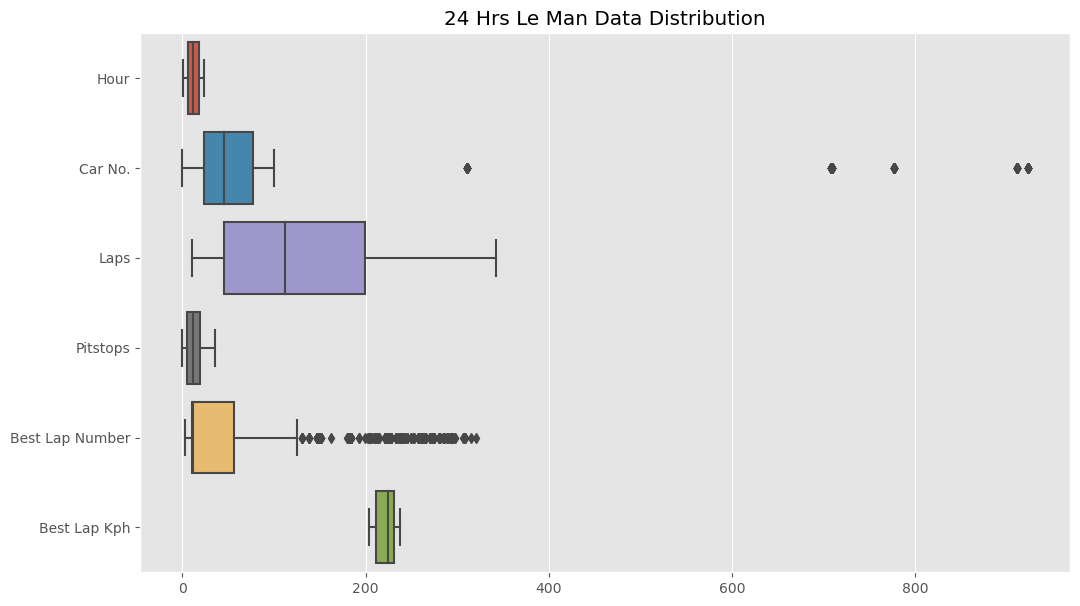

In [11]:
# Distribution of Data

plt.figure(figsize=(12,7))
plt.title('24 Hrs Le Man Data Distribution')
sn.boxplot(le_man.drop('Total Time',axis=1),orient='h')
plt.show()

In [12]:
# To see Fastest and Slowest Covered Lap time

print('Fastest Lap Cover Time :',min(le_man['Best LapTime']))
print('----------------------------------------')
print('Slowest Lap Cover Time :',max(le_man['Best LapTime']))

Fastest Lap Cover Time : 03:27.0
----------------------------------------
Slowest Lap Cover Time : 04:00.3


##### The 'Total Time' and 'Best LapTime' column in is String format
##### for making it usable we need to convert it into float type

In [13]:
# This will convert string column into time (hr:min:sec) format and will show time in total seconds

le_man['total_time'] = pd.to_datetime(le_man['Total Time'],format='%H:%M:%S')
le_man['total_time'] = le_man['total_time'].dt.hour * 3600 + le_man['total_time'].dt.minute * 60 + le_man['total_time'].dt.second
le_man['total_time'] = le_man['total_time'].astype(float)
le_man['total_time'].head(3)

0    3675.0
1    3679.0
2    3681.0
Name: total_time, dtype: float64

In [14]:
# This will convert string column in time (sec:for sec) format

le_man['Best LapTime'] = pd.to_datetime(le_man['Best LapTime'],format='%M:%S.%f')
le_man['Lap_record'] = le_man['Best LapTime'].dt.minute * 60 + le_man['Best LapTime'].dt.second + + le_man['Best LapTime'].dt.microsecond / 1e6
le_man['Lap_record']

0       209.7
1       209.1
2       210.0
3       209.9
4       210.0
        ...  
1481    231.4
1482    238.7
1483    236.2
1484    234.8
1485    219.1
Name: Lap_record, Length: 1483, dtype: float64

In [15]:
# To check converted 'Total Time' and 'Best LapTime' column into 'total_time' and 'Lap_record'

le_man

,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,total_time,Lap_record
0,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,1:01:15,0,10.0,1900-01-01 00:03:29.700,234.0,3675.0,209.7
1,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,1:01:19,0,12.0,1900-01-01 00:03:29.100,234.6,3679.0,209.1
2,1,7,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ,Toyota GR010 HYBRID,HYPERCAR,M,12,1:01:21,0,12.0,1900-01-01 00:03:30.000,233.6,3681.0,210.0
3,1,75,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY,Porsche 963,HYPERCAR,M,12,1:01:22,0,12.0,1900-01-01 00:03:29.900,233.7,3682.0,209.9
4,1,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,12,1:01:23,0,9.0,1900-01-01 00:03:30.000,233.6,3683.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,24,60,Iron Lynx,C. SCHIAVONI / M. CRESSONI / A. PICARIELLO,Porsche 911 RSR - 19,LMGTE Am,M,28,2:20:55,2,8.0,1900-01-01 00:03:51.400,212.0,8455.0,231.4
1482,24,16,Proton Competition,R. HARDWICK / Z. ROBICHON / J. HEYLEN,Porsche 911 RSR - 19,LMGTE Am,M,28,2:20:57,2,10.0,1900-01-01 00:03:58.700,205.5,8457.0,238.7
1483,24,55,GMB Motorsport,G. BIRCH / M. SØRENSEN/ J. MØLLER,Aston Martin Vantage AMR,LMGTE Am,M,21,1:45:27,2,17.0,1900-01-01 00:03:56.200,207.7,6327.0,236.2
1484,24,21,AF Corse,S. MANN / J. PIGUET / U. DE PAUW,Ferrari 488 GTE Evo,LMGTE Am,M,21,1:45:28,2,11.0,1900-01-01 00:03:54.800,208.9,6328.0,234.8


In [16]:
# Let's see how many teams are participated

le_man['Team'].nunique()

45

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


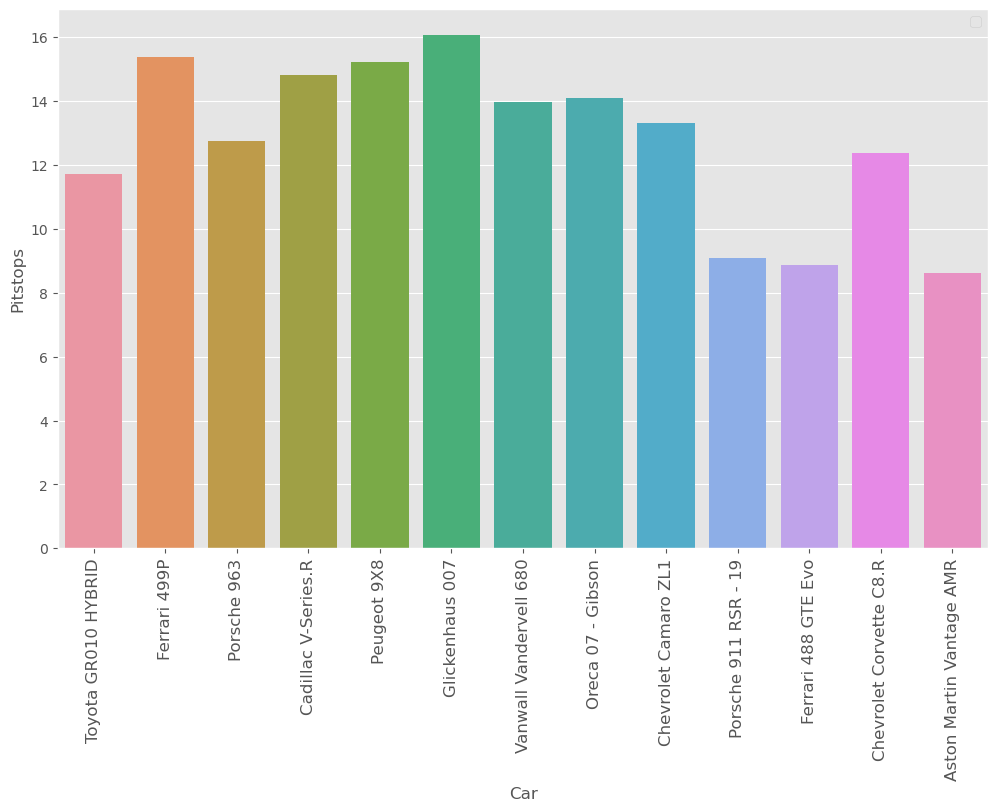

In [17]:
# Visualization of Cars with Pitstops taken count

plt.figure(figsize=(12,7))
sn.barplot(data=le_man,x='Car',y='Pitstops',errorbar=None)
plt.legend()
plt.xticks(rotation='vertical',size=12)
plt.show()

#### Every Team has 3-cars with 3-drivers, lets see it is correct or not

In [18]:
# To check Teams Drivers name

le_man[['Team','Drivers']]

,Team,Drivers
0,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA
1,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI
2,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ
3,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY
4,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR
...,...,...
1481,Iron Lynx,C. SCHIAVONI / M. CRESSONI / A. PICARIELLO
1482,Proton Competition,R. HARDWICK / Z. ROBICHON / J. HEYLEN
1483,GMB Motorsport,G. BIRCH / M. SØRENSEN/ J. MØLLER
1484,AF Corse,S. MANN / J. PIGUET / U. DE PAUW


In [19]:
# To see each teams "Car" , "Car No." and its "Category"

le_man[['Team','Car','Car No.','Category']]

,Team,Car,Car No.,Category
0,Toyota Gazoo Racing,Toyota GR010 HYBRID,8,HYPERCAR
1,Ferrari AF Corse,Ferrari 499P,51,HYPERCAR
2,Toyota Gazoo Racing,Toyota GR010 HYBRID,7,HYPERCAR
3,Porsche Penske Motorsport,Porsche 963,75,HYPERCAR
4,Porsche Penske Motorsport,Porsche 963,6,HYPERCAR
...,...,...,...,...
1481,Iron Lynx,Porsche 911 RSR - 19,60,LMGTE Am
1482,Proton Competition,Porsche 911 RSR - 19,16,LMGTE Am
1483,GMB Motorsport,Aston Martin Vantage AMR,55,LMGTE Am
1484,AF Corse,Ferrari 488 GTE Evo,21,LMGTE Am


##### Let's see who is winner and about it's top speed

In [20]:
print('Fastest Covered lap :',min(le_man['Lap_record']),'sec.')
print('-------------------------------')
print('Top Speed           :',max(le_man['Best Lap Kph']),'Kph')

Fastest Covered lap : 207.0 sec.
-------------------------------
Top Speed           : 237.0 Kph


In [21]:
# To check car with Fastest Lap record as well as Top Speed

le_man[(le_man['Lap_record']==207.0)][['Car','Car No.','Team','Best Lap Kph','Lap_record','Total Time','Best LapTime']]

,Car,Car No.,Team,Best Lap Kph,Lap_record,Total Time,Best LapTime
1368,Ferrari 499P,50,Ferrari AF Corse,237.0,207.0,23:06:18,1900-01-01 00:03:27


# 2023 Winner : Ferrari 499P

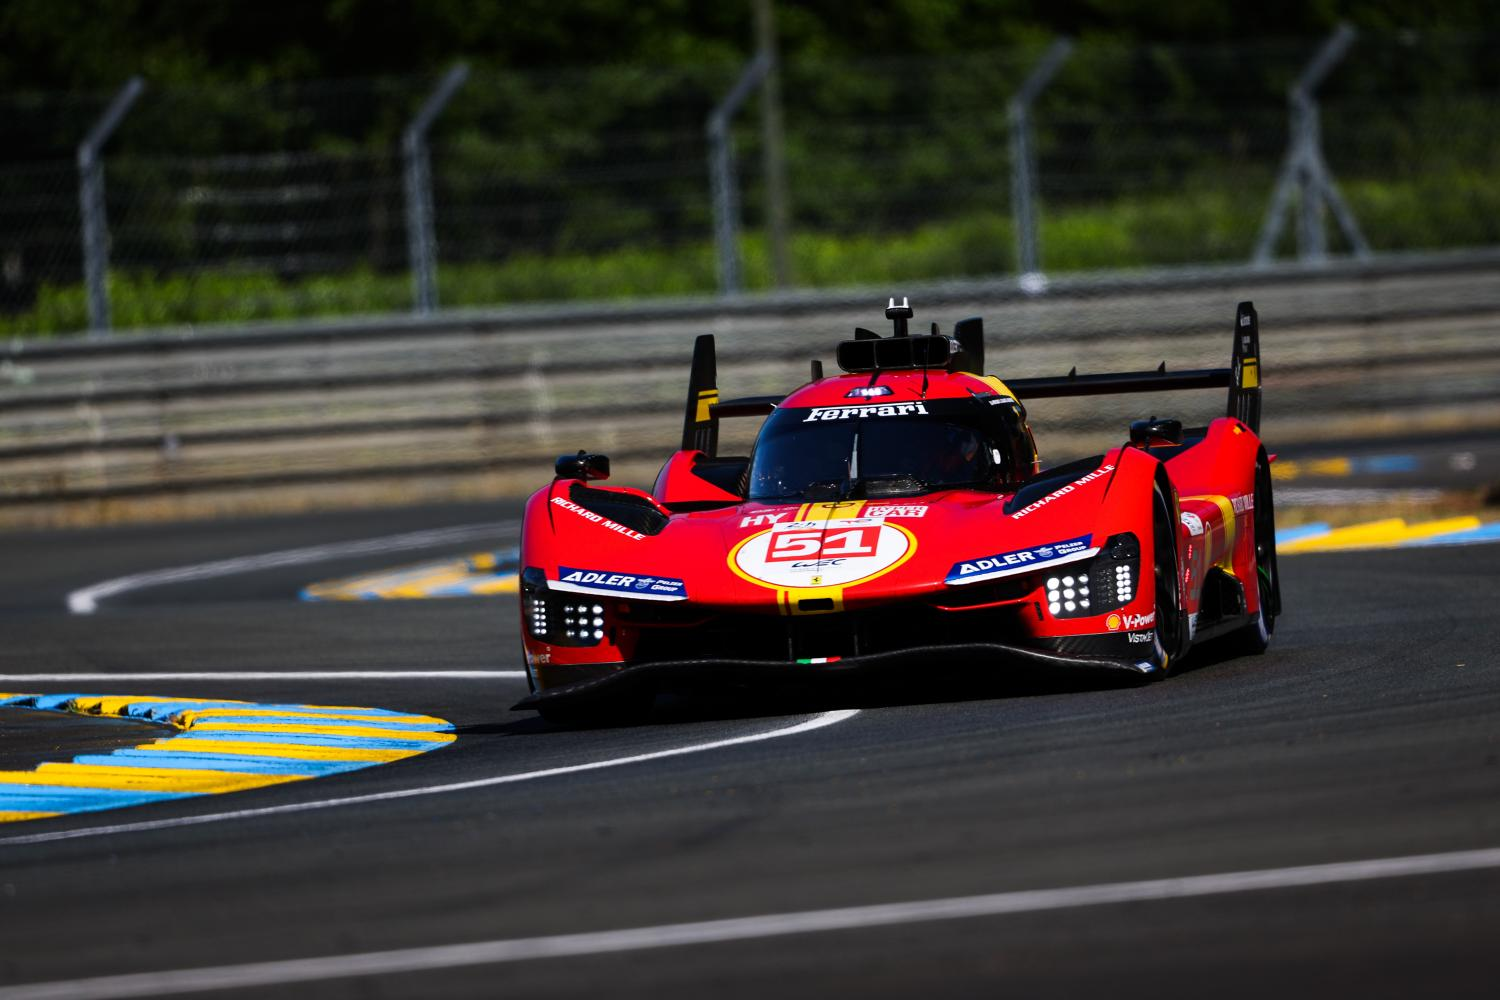

### Let's see Top 10 Fastest Car of League

In [22]:
# Sorting by 'Best Lap Kph' and taking unique 'Car' values and storing it into new variable

top_speed = le_man.sort_values(by='Best Lap Kph')
top_10_speed = top_speed['Car'].unique()[:10]
Fastest_10 = le_man[le_man['Car'].isin(top_10_speed)][['Car','Team', 'Laps', 'Best LapTime', 'Pitstops', 'Best Lap Kph']]

In [23]:
# Sorting 'Fastest_10' dataset into Highest to Lowest by 'Best Lap Kph'

Fastest_10=Fastest_10.sort_values(by='Best Lap Kph',ascending=False)
Fastest_10.head(5)

,Car,Team,Laps,Best LapTime,Pitstops,Best Lap Kph
1368,Ferrari 499P,Ferrari AF Corse,322,1900-01-01 00:03:27.000,30,237.0
1429,Ferrari 499P,Ferrari AF Corse,337,1900-01-01 00:03:27.200,31,236.7
1060,Ferrari 499P,Ferrari AF Corse,242,1900-01-01 00:03:27.400,23,236.5
1245,Ferrari 499P,Ferrari AF Corse,287,1900-01-01 00:03:27.400,27,236.5
1306,Ferrari 499P,Ferrari AF Corse,304,1900-01-01 00:03:27.400,29,236.5


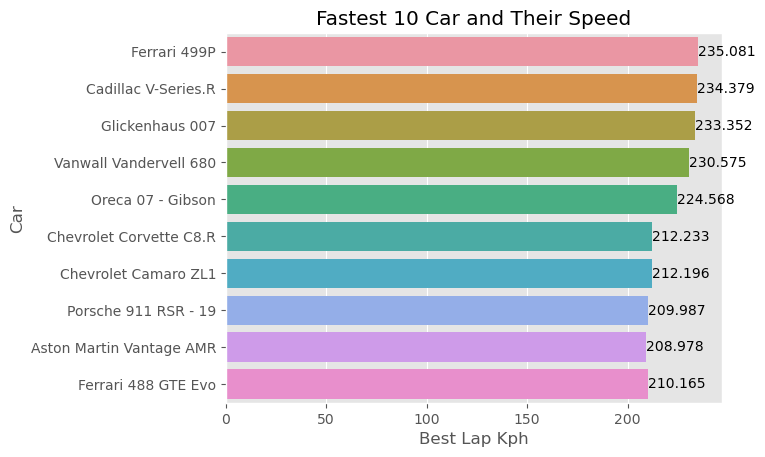

In [24]:
# Visulaization of Top 10 Fast cars

ax = sn.barplot(data=Fastest_10,x='Best Lap Kph',y='Car',errorbar=None,width=0.8)
plt.title('Fastest 10 Car and Their Speed')
ax.bar_label(ax.containers[0], fontsize=10);

### Let's see Laps Covered by each car

In [25]:
# Sorting by 'Laps' and storing it into new variable

Laps_10 = le_man.sort_values(by='Laps',ascending=False)
Laps_Covered = Laps_10.sort_values(by='Laps',ascending=False)
Laps_Covered.head(4)

,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,total_time,Lap_record
1426,24,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,342,0:01:40,31,308.0,1900-01-01 00:03:27.500,236.3,100.0,207.5
1425,24,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,342,0:00:18,30,264.0,1900-01-01 00:03:27.900,236.0,18.0,207.9
1427,24,2,Cadillac Racing,E. BAMBER / A. LYNN / R. WESTBROOK,Cadillac V-Series.R,HYPERCAR,M,341,0:02:37,29,263.0,1900-01-01 00:03:28.000,235.9,157.0,208.0
1428,24,3,Cadillac Racing,S. BOURDAIS / R. VAN DER ZANDE / S. DIXON,Cadillac V-Series.R,HYPERCAR,M,340,0:02:37,30,12.0,1900-01-01 00:03:28.300,235.5,157.0,208.3


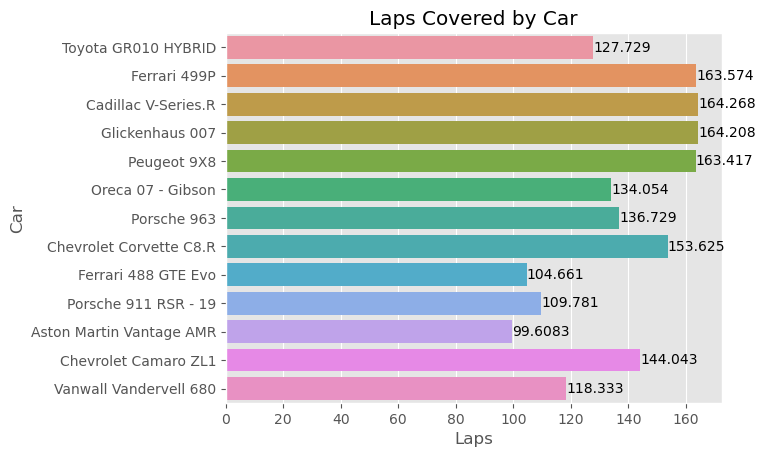

In [26]:
# Visualization of Number of Laps Covered by each car

ax = sn.barplot(data=Laps_Covered,x='Laps',y='Car',errorbar=None,width=0.8)
plt.title('Laps Covered by Car')
ax.bar_label(ax.containers[0], fontsize=10);

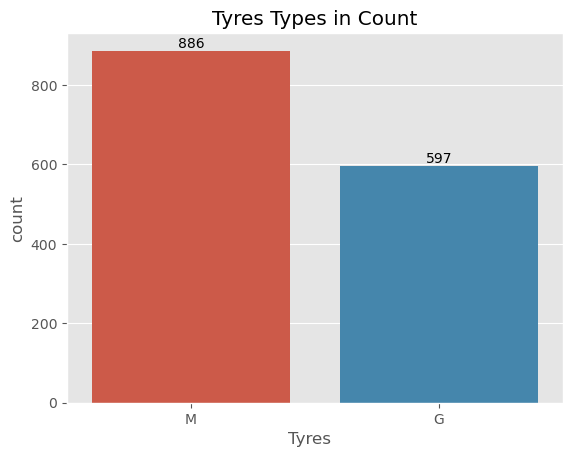

In [27]:
# To see counts of Type of Tyres

ax = sn.countplot(data=le_man,x='Tyres  ')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Tyres Types in Count')
plt.show()

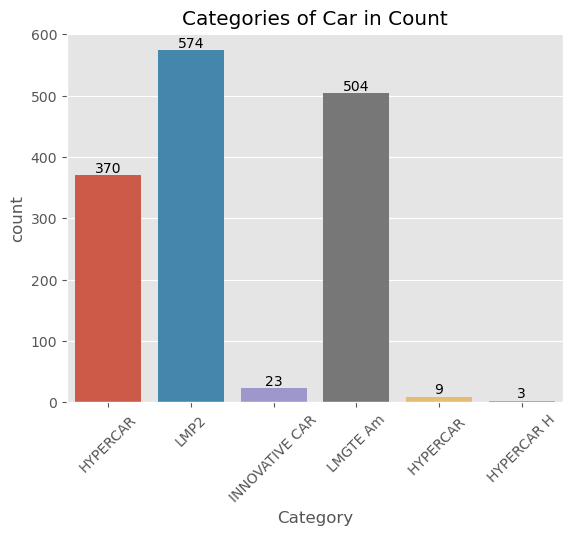

In [28]:
# To see Count of differet category cars

ax = sn.countplot(data=le_man,x='Category')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Categories of Car in Count')
plt.show()

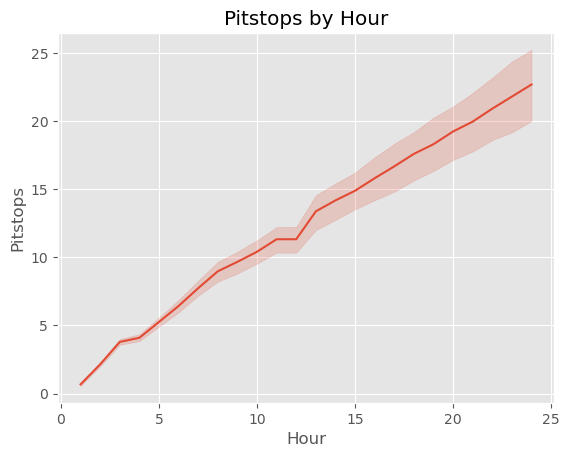

In [29]:
# Visualization of Pattern of Pitsopts Taken Hour-by-Hour by all cars

ax = sn.lineplot(data=le_man,x='Hour',y='Pitstops')
plt.title('Pitstops by Hour')
plt.show()

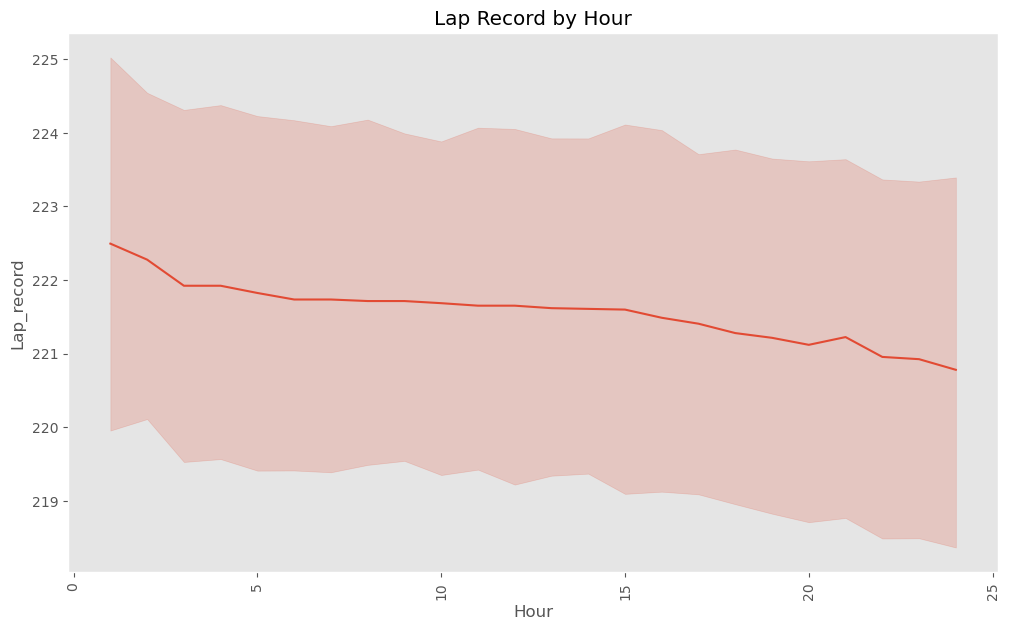

In [30]:
# Visualization of Pattern of Hour by Hour Lap record Covered by Cars
plt.figure(figsize=(12,7))
ax = sn.lineplot(data=le_man,x='Hour',y='Lap_record')
plt.title('Lap Record by Hour')
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show()

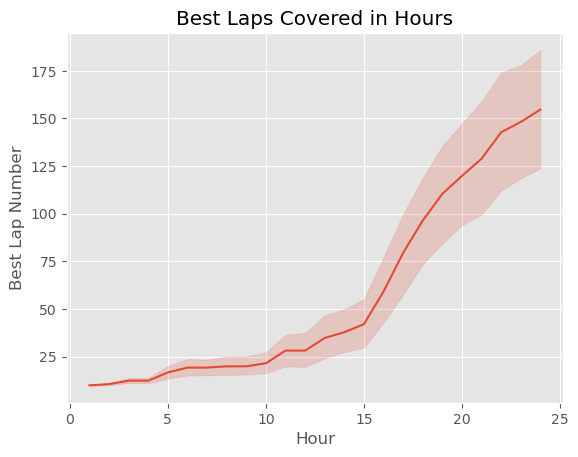

In [31]:
# Visualization of Pattern of Best Lap Covered in Hour by Hour

ax = sn.lineplot(data=le_man,x='Hour',y='Best Lap Number')
plt.title('Best Laps Covered in Hours')
plt.show()

In [32]:
# Dataset Sample

le_man.sample(5)

,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,total_time,Lap_record
817,14,34,Inter Europol Competition,J. SMIECHOWSKI / A. COSTA / F. SCHERER,Oreca 07 - Gibson,LMP2,G,179,14:03:36,20,66.0,1900-01-01 00:03:38.600,224.4,50616.0,218.6
1324,22,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR H,M,288,22:03:25,25,227.0,1900-01-01 00:03:28.300,235.5,79405.0,208.3
1011,17,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,220,17:04:22,19,214.0,1900-01-01 00:03:28.900,234.8,61462.0,208.9
1362,22,14,Nielsen Racing,R. SALES / M. BECHE / B. HANLEY,Oreca 07 - Gibson,LMP2,G,18,1:27:23,2,13.0,1900-01-01 00:03:44.200,218.8,5243.0,224.2
961,16,54,AF Corse,T. FLOHR / F. CASTELLACCI / D. RIGON,Ferrari 488 GTE Evo,LMGTE Am,M,199,16:05:04,16,8.0,1900-01-01 00:03:52.100,211.3,57904.0,232.1


# Label Encoding

In [33]:
# Encoding categorical column into numerical for Modeling

le = LabelEncoder()

le_man['Team'] = le.fit_transform(le_man['Team'])
le_man['Drivers'] = le.fit_transform(le_man['Drivers'])
le_man['Car'] = le.fit_transform(le_man['Car'])
le_man['Category'] = le.fit_transform(le_man['Category'])
le_man['Tyres  '] = le.fit_transform(le_man['Tyres  '])

In [34]:
# Lets check encoded dataset

le_man

,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,total_time,Lap_record
0,1,8,41,53,11,0,1,12,1:01:15,0,10.0,1900-01-01 00:03:29.700,234.0,3675.0,209.7
1,1,51,12,4,5,0,1,12,1:01:19,0,12.0,1900-01-01 00:03:29.100,234.6,3679.0,209.1
2,1,7,41,31,11,0,1,12,1:01:21,0,12.0,1900-01-01 00:03:30.000,233.6,3681.0,210.0
3,1,75,32,16,10,0,1,12,1:01:22,0,12.0,1900-01-01 00:03:29.900,233.7,3682.0,209.9
4,1,6,32,26,10,0,1,12,1:01:23,0,9.0,1900-01-01 00:03:30.000,233.6,3683.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,24,60,23,9,9,4,1,28,2:20:55,2,8.0,1900-01-01 00:03:51.400,212.0,8455.0,231.4
1482,24,16,35,48,9,4,1,28,2:20:57,2,10.0,1900-01-01 00:03:58.700,205.5,8457.0,238.7
1483,24,55,14,18,0,4,1,21,1:45:27,2,17.0,1900-01-01 00:03:56.200,207.7,6327.0,236.2
1484,24,21,1,56,4,4,1,21,1:45:28,2,11.0,1900-01-01 00:03:54.800,208.9,6328.0,234.8


# 1. Total Time Prediction

In [35]:
# Taking x as feature for Total Time Prediction

x = le_man[['Hour','Car No.','Category','Tyres  ','Laps','Pitstops','Best Lap Number','Best Lap Kph','Lap_record']]
x.head()

,Hour,Car No.,Category,Tyres,Laps,Pitstops,Best Lap Number,Best Lap Kph,Lap_record
0,1,8,0,1,12,0,10.0,234.0,209.7
1,1,51,0,1,12,0,12.0,234.6,209.1
2,1,7,0,1,12,0,12.0,233.6,210.0
3,1,75,0,1,12,0,12.0,233.7,209.9
4,1,6,0,1,12,0,9.0,233.6,210.0


In [36]:
# Taking y as Target for Total Time Prediction

y = le_man['total_time']
y

0       3675.0
1       3679.0
2       3681.0
3       3682.0
4       3683.0
         ...  
1481    8455.0
1482    8457.0
1483    6327.0
1484    6328.0
1485    5665.0
Name: total_time, Length: 1483, dtype: float64

# Log Transfromation

In [37]:
# Log Transforming on Target column to mitigate the impact of outliers.
# or else it will affect on MSE

y = np.log1p(y)
y

0       8.209580
1       8.210668
2       8.211211
3       8.211483
4       8.211754
          ...   
1481    9.042632
1482    9.042868
1483    8.752740
1484    8.752898
1485    8.642239
Name: total_time, Length: 1483, dtype: float64

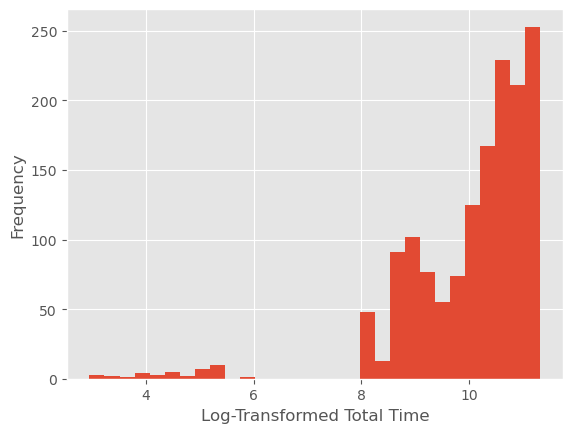

In [38]:
# Histogram of the log-transformed 'Total Time'

plt.hist(y, bins=30)
plt.xlabel('Log-Transformed Total Time')
plt.ylabel('Frequency')
plt.show()


# Feature Importance

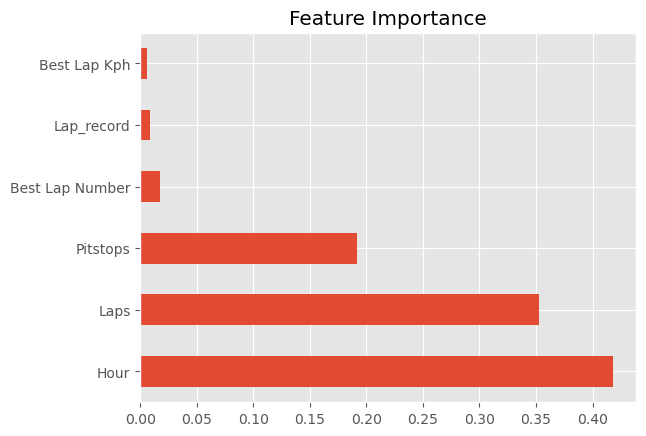

In [39]:
# To see feature importance for Total Time Prediction

etr = ExtraTreesRegressor()

etr.fit(x,y)

feat_imp = pd.Series(etr.feature_importances_,index=x.columns)
feat_imp.nlargest(6).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# Train Test Split

In [40]:
# Splitting data into train and test in ratio 80:20 for model building

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=78)

In [41]:
# To see shapes of xtrain,xtest, ytrain and ytest

print('xtrain :',xtrain.shape)
print('xtest  :',xtest.shape)
print('ytrain :',ytrain.shape)
print('ytest  :',ytest.shape)

xtrain : (1186, 9)
xtest  : (297, 9)
ytrain : (1186,)
ytest  : (297,)


# Standardization

In [42]:
# Using MinMaxScaler for scaling down xtrain and xtest value

mm = MinMaxScaler()

xtrain = mm.fit_transform(xtrain)
xtest = mm.transform(xtest)

In [43]:
# scaled xtrain

xtrain

array([[0.56521739, 0.76655809, 0.        , ..., 0.08201893, 0.89361702,
        0.09309309],
       [0.13043478, 0.06623236, 1.        , ..., 0.02208202, 0.5775076 ,
        0.38738739],
       [0.2173913 , 0.0369164 , 1.        , ..., 0.02208202, 0.65349544,
        0.31231231],
       ...,
       [0.        , 0.08794788, 0.8       , ..., 0.01577287, 0.20972644,
        0.76576577],
       [0.30434783, 0.02388708, 0.6       , ..., 0.18927445, 0.24620061,
        0.72672673],
       [0.47826087, 0.05646037, 0.8       , ..., 0.01577287, 0.21884498,
        0.75375375]])

In [44]:
# scaled xtest

xtest

array([[0.52173913, 0.03148751, 1.        , ..., 0.15772871, 0.59270517,
        0.36936937],
       [0.43478261, 0.02497286, 0.8       , ..., 0.08201893, 0.2006079 ,
        0.77477477],
       [0.2173913 , 0.10640608, 0.8       , ..., 0.02523659, 0.14893617,
        0.83183183],
       ...,
       [0.86956522, 0.        , 0.        , ..., 0.82018927, 0.96656535,
        0.03003003],
       [0.56521739, 0.33550489, 0.        , ..., 0.16088328, 0.87537994,
        0.10810811],
       [0.47826087, 0.76764387, 0.        , ..., 0.02523659, 0.87841945,
        0.10810811]])

# Model Building Total Time

### Linear Regression : Total Time

In [45]:
# Linear Regression Model for Total Time Prediction

linr = LinearRegression()

linr.fit(xtrain,ytrain)
linr_total_time_pred = linr.predict(xtest)

In [46]:
# Model Score

linr_train_score = linr.score(xtrain,ytrain)*100
linr_test_score = linr.score(xtest,ytest)*100
linr_r2_score = r2_score(ytest,linr_total_time_pred)*100

print('Linear Train Score :',linr_train_score)
print('-------------------------------------------------------')
print('Linear Test Score  :',linr_test_score)
print('-------------------------------------------------------')
print('Linear r2_Score    :',linr_r2_score)

Linear Train Score : 14.988043447350252
-------------------------------------------------------
Linear Test Score  : 29.294518303536076
-------------------------------------------------------
Linear r2_Score    : 29.294518303536076


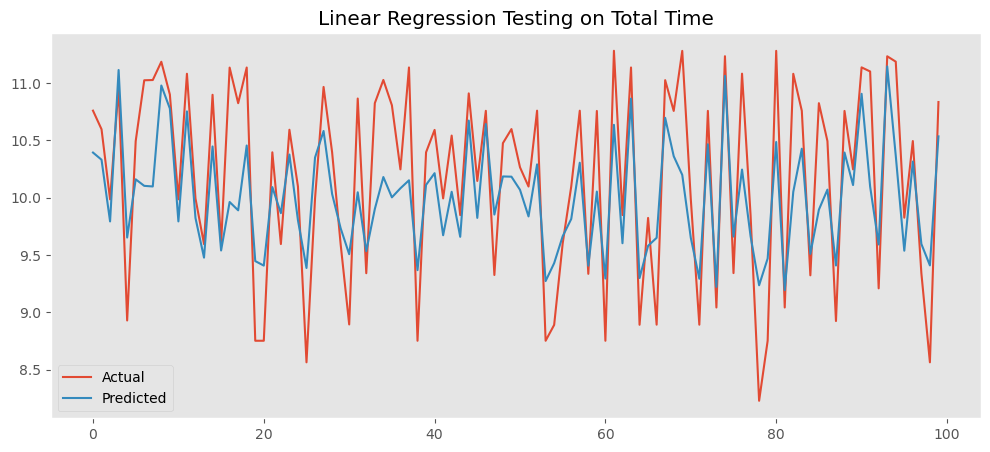

In [47]:
# Let see visualization of Actual and Predicted value of Linear Regression Model

linear_total_time = pd.DataFrame({'Actual':ytest,'Predicted':linr_total_time_pred})

plt.figure(figsize=(12,5))
linear_total_time = linear_total_time.reset_index()
linear_total_time.drop('index',axis=1,inplace=True)

plt.plot(linear_total_time[:100])
plt.legend(['Actual','Predicted'])
plt.grid(False)
plt.title('Linear Regression Testing on Total Time')

plt.show()

### Decision Tree Regressor : Total Time

In [48]:
# DecisionTree Regressor Model for Total Time Prediction

dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
dtr_total_time_pred = dtr.predict(xtest)

In [49]:
# Model Score

dtr_train_score = dtr.score(xtrain,ytrain)*100
dtr_test_score = dtr.score(xtest,ytest)*100
dtr_r2_score = r2_score(ytest,dtr_total_time_pred)*100

print('DecisionTree Train Score :',dtr_train_score)
print('-----------------------------------------------')
print('DecisionTree Test Score  :',dtr_test_score)
print('-------------------------------------------------------')
print('DecisionTree r2_Score    :',dtr_r2_score)

DecisionTree Train Score : 100.0
-----------------------------------------------
DecisionTree Test Score  : 86.4256502594024
-------------------------------------------------------
DecisionTree r2_Score    : 86.4256502594024


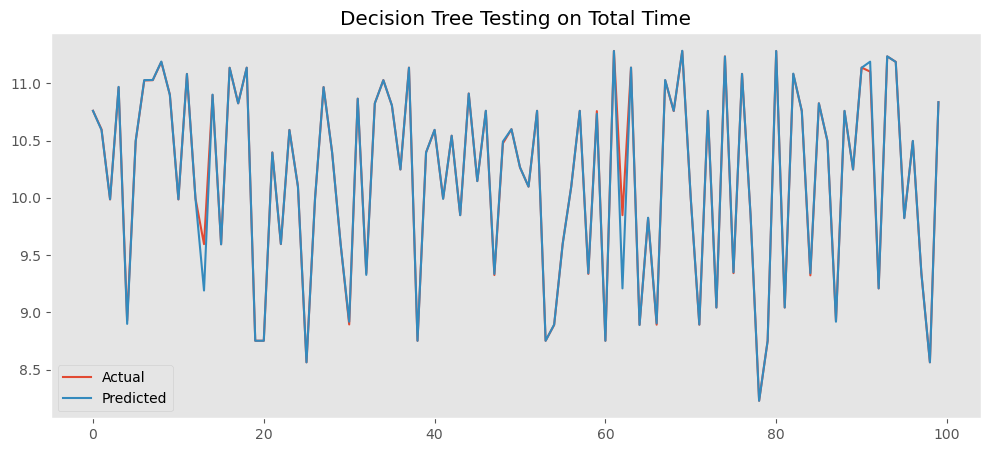

In [50]:
# Let see visualization of Actual and Predicted value of DecisionTree Model

DecisionTree_total_time = pd.DataFrame({'Actual':ytest,'Predicted':dtr_total_time_pred})

plt.figure(figsize=(12,5))
DecisionTree_total_time = DecisionTree_total_time.reset_index()
DecisionTree_total_time.drop('index',axis=1,inplace=True)

plt.plot(DecisionTree_total_time[:100])
plt.legend(['Actual','Predicted'])
plt.title('Decision Tree Testing on Total Time')
plt.grid(False)

plt.show()

### RandomForest : Total Time

In [51]:
# RandomForest Regressor Model for Total Time Prediction

rfr = RandomForestRegressor()

rfr.fit(xtrain,ytrain)
rfr_total_time_pred = rfr.predict(xtest)

In [52]:
# Model Score

rfr_train_score = rfr.score(xtrain,ytrain)*100
rfr_test_score = rfr.score(xtest,ytest)*100
rfr_r2_score = r2_score(ytest,rfr_total_time_pred)*100

print('RandomForest Train Score :',rfr_train_score)
print('------------------------------------------------')
print('RandomForest Test Score :',rfr_test_score)
print('------------------------------------------------')
print('RandomForest r2_Score :',rfr_r2_score)

RandomForest Train Score : 99.70282029278843
------------------------------------------------
RandomForest Test Score : 95.13192347576697
------------------------------------------------
RandomForest r2_Score : 95.13192347576697


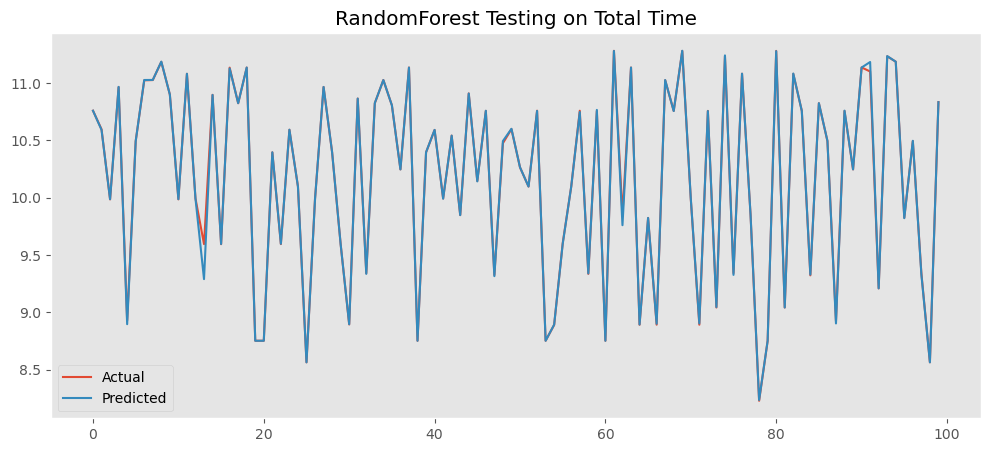

In [53]:
# Let see visualization of Actual and Predicted value of RandomForest Model

RandomForest_total_time = pd.DataFrame({'Actual':ytest,'Predicted':rfr_total_time_pred})

plt.figure(figsize=(12,5))
RandomForest_total_time = RandomForest_total_time.reset_index()
RandomForest_total_time.drop('index',axis=1,inplace=True)

plt.plot(RandomForest_total_time[:100])
plt.legend(['Actual','Predicted'])
plt.title('RandomForest Testing on Total Time')
plt.grid(False)

plt.show()

### GradientBoosting : Total Time

In [54]:
# GradientBoosting Regressor Model for Total Time Prediction

gbr = GradientBoostingRegressor()

gbr.fit(xtrain,ytrain)
gbr_total_time_pred = gbr.predict(xtest)

In [55]:
# Model Score

gbr_train_score = gbr.score(xtrain,ytrain)*100
gbr_test_score = gbr.score(xtest,ytest)*100
gbr_r2_score = r2_score(ytest,gbr_total_time_pred)*100

print('GradientBoosting Train Score :',gbr_train_score)
print('--------------------------------------------------')
print('GradientBoosting Test Score :',gbr_test_score)
print('--------------------------------------------------')
print('GradientBoosting r2_Score :',gbr_r2_score)

GradientBoosting Train Score : 99.84395587525884
--------------------------------------------------
GradientBoosting Test Score : 88.87486630428165
--------------------------------------------------
GradientBoosting r2_Score : 88.87486630428165


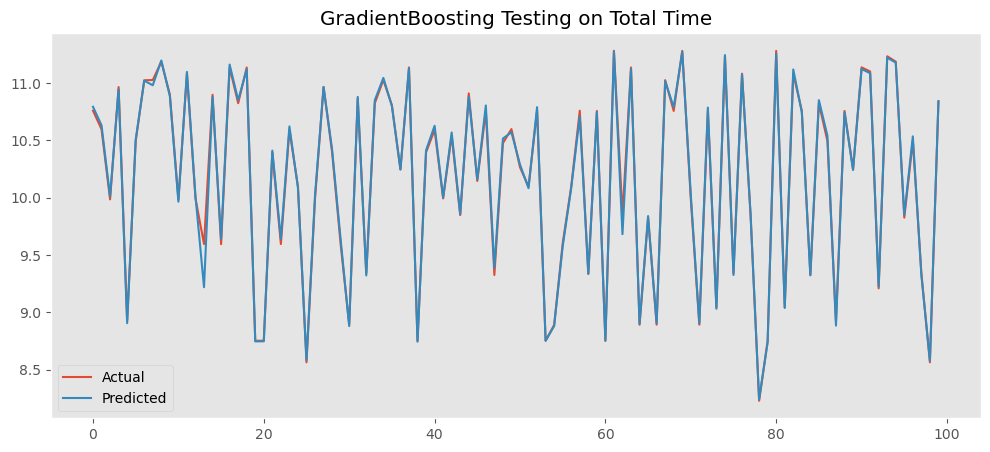

In [56]:
# Let see visualization of Actual and Predicted value of GradientBoosting Model

GradeintBoosting_total_time = pd.DataFrame({'Actual':ytest,'Predicted':gbr_total_time_pred})

plt.figure(figsize=(12,5))
GradeintBoosting_total_time = GradeintBoosting_total_time.reset_index()
GradeintBoosting_total_time.drop('index',axis=1,inplace=True)

plt.plot(GradeintBoosting_total_time[:100])
plt.legend(['Actual','Predicted'])
plt.title('GradientBoosting Testing on Total Time')
plt.grid(False)

plt.show()

### KNieghbor : Total time

In [57]:
# KNeighbors Regressor Model for Total Time Prediction

knr = KNeighborsRegressor()

knr.fit(xtrain,ytrain)
knr_total_time_pred = knr.predict(xtest)

In [58]:
# Model Score

knr_train_score = knr.score(xtrain,ytrain)*100
knr_test_score = knr.score(xtest,ytest)*100
knr_r2_score = r2_score(ytest,knr_total_time_pred)*100

print('KNeighbors Train Score :',knr_train_score)
print('------------------------------------------------')
print('Kneighbors Test Score :',knr_test_score)
print('------------------------------------------------')
print('Kneighbors r2_Score :',knr_r2_score)

KNeighbors Train Score : 75.79694925903723
------------------------------------------------
Kneighbors Test Score : 62.18125753221766
------------------------------------------------
Kneighbors r2_Score : 62.18125753221766


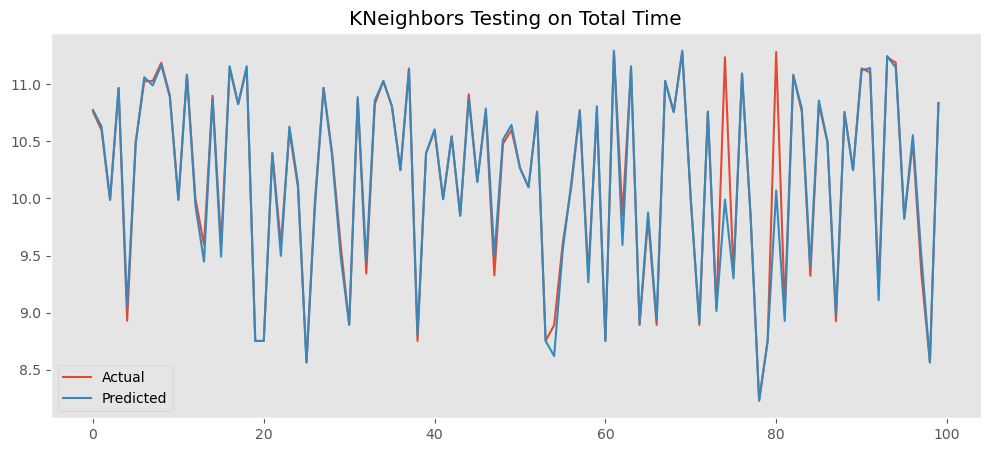

In [59]:
# Let see visualization of Actual and Predicted value of KNeighbors Model

KNeighbors_total_time = pd.DataFrame({'Actual':ytest,'Predicted':knr_total_time_pred})

plt.figure(figsize=(12,5))
KNeighbors_total_time = KNeighbors_total_time.reset_index()
KNeighbors_total_time.drop('index',axis=1,inplace=True)

plt.plot(KNeighbors_total_time[:100])
plt.legend(['Actual','Predicted'])
plt.title('KNeighbors Testing on Total Time')
plt.grid(False)

plt.show()

### Support Vector Machine : Total Time

In [60]:
# Support Vector Regressor Model for Total Time Prediction

svr = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)

svr.fit(xtrain,ytrain)
svr_total_time_pred = svr.predict(xtest)

In [61]:
# Model Score

svr_train_score = svr.score(xtrain,ytrain)*100
svr_test_score = svr.score(xtest,ytest)*100
svr_r2_score = r2_score(ytest,svr_total_time_pred)*100

print('SVR Train Score :',svr_train_score)
print('-----------------------------------------')
print('SVR Test Score :',svr_test_score)
print('-----------------------------------------')
print('SVR r2_Score :',svr_r2_score)

SVR Train Score : 22.099007279200688
-----------------------------------------
SVR Test Score : 45.156121924213366
-----------------------------------------
SVR r2_Score : 45.156121924213366


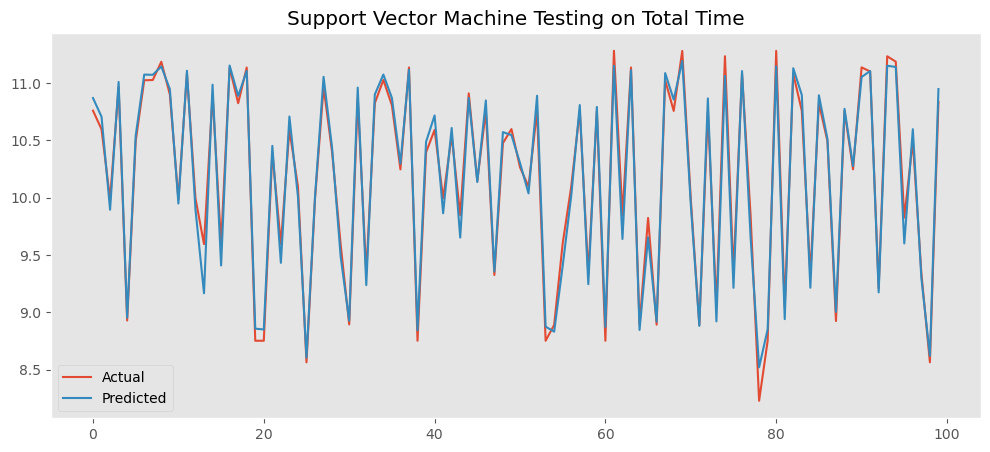

In [62]:
# Let see visualization of Actual and Predicted value of Support Vector Model

Svr_total_time = pd.DataFrame({'Actual':ytest,'Predicted':svr_total_time_pred})

plt.figure(figsize=(12,5))
Svr_total_time = Svr_total_time.reset_index()
Svr_total_time.drop('index',axis=1,inplace=True)

plt.plot(Svr_total_time[:100])
plt.legend(['Actual','Predicted'])
plt.title('Support Vector Machine Testing on Total Time')
plt.grid(False)

plt.show()

# Total Time Performance

In [63]:
# Storing all model score in one dataset to comapare and get best one

total_time_score = pd.DataFrame({'Model_Name':['Linear Regression','Decision Tree',
                                'Random Forest','Gradient Boosting','KNeighbors',
                                'Support Vector Regressor'],
                                'Accuracy_Score':[linr_r2_score,dtr_r2_score,rfr_r2_score,
                                                 gbr_r2_score,knr_r2_score,svr_r2_score]})

total_time_score

,Model_Name,Accuracy_Score
0,Linear Regression,29.294518
1,Decision Tree,86.425650
2,Random Forest,95.131923
3,Gradient Boosting,88.874866
4,KNeighbors,62.181258
5,Support Vector Regressor,45.156122


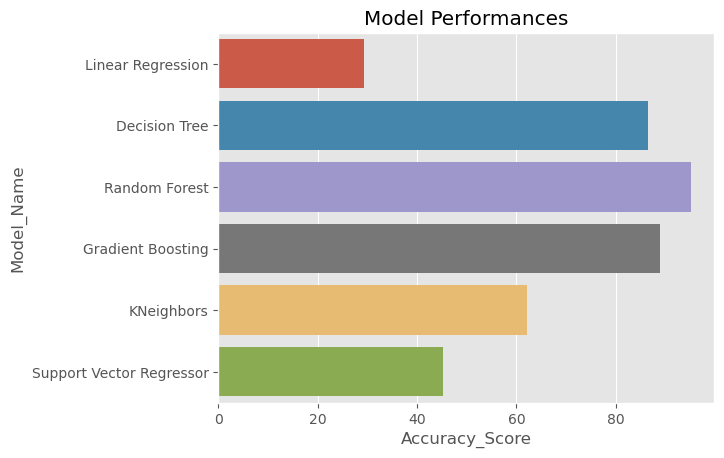

In [64]:
# Visualizaion of all models scores on Total Time Prediction

sn.barplot(data=total_time_score,x='Accuracy_Score',y='Model_Name')
plt.title('Model Performances')
plt.show()

# Model Evaluation : RandomForest for Total Time

In [65]:
# Model Evaluation : Random Forest is givig best accuracy so we will go with Random Forest

print('MAE :',mean_absolute_error(ytest,rfr_total_time_pred))
print('---------------------------------')
print('MSE : ',mean_squared_error(ytest,rfr_total_time_pred))
print('---------------------------------')
print('r2_score :',r2_score(ytest,rfr_total_time_pred)*100)

MAE : 0.03224580184838569
---------------------------------
MSE :  0.06161879289354795
---------------------------------
r2_score : 95.13192347576697


In [66]:
pd.DataFrame({'Actaual':ytest,'Predicted':rfr_total_time_pred})

,Actaual,Predicted
761,10.759179,10.758930
652,10.596910,10.591744
358,9.985759,9.987254
937,10.964831,10.966959
99,8.929700,8.897437
...,...,...
344,9.987967,9.987516
147,9.358243,9.338690
1241,11.234309,11.240783
845,10.833583,10.832281


##### Random Forest Model is working good still will check for cross validation

# Cross Validating

In [67]:
# Creating Parameters for DecisionTree Regressor

parameter = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'max_features':['auto','sqrt','log']}
dtr = DecisionTreeRegressor()

In [68]:
# Building cross validation Model

cvr = GridSearchCV(dtr,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [69]:
# Applying Cross_validation model

cvr.fit(xtrain,ytrain)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-pack

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [70]:
# Best Parameteres of Cross Validation Model

cvr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [71]:
# Model Score

cvr_pred = cvr.predict(xtest)

print('MSE :',mean_squared_error(ytest,cvr_pred))
print('----------------')
print('accuracy :',r2_score(ytest,cvr_pred)*100)

MSE : 0.029128829583715047
----------------
accuracy : 97.69873175347912


# Result

In [72]:
# Checking Actual and Predicted value of Cross Validation Model

pd.DataFrame({'Actual':ytest,'Predicted':cvr_pred})

,Actual,Predicted
761,10.759179,10.754869
652,10.596910,10.754869
358,9.985759,10.052922
937,10.964831,11.030744
99,8.929700,8.897819
...,...,...
344,9.987967,9.822013
147,9.358243,9.225443
1241,11.234309,11.270195
845,10.833583,10.864739


# 2. Best Lap Kph Prediction

In [73]:
X = le_man[['Hour','Car','Category','Tyres  ','Laps','Pitstops','total_time']]
X.head(3)

,Hour,Car,Category,Tyres,Laps,Pitstops,total_time
0,1,11,0,1,12,0,3675.0
1,1,5,0,1,12,0,3679.0
2,1,11,0,1,12,0,3681.0


In [74]:
Y = le_man['Best Lap Kph']
Y.head()

0    234.0
1    234.6
2    233.6
3    233.7
4    233.6
Name: Best Lap Kph, dtype: float64

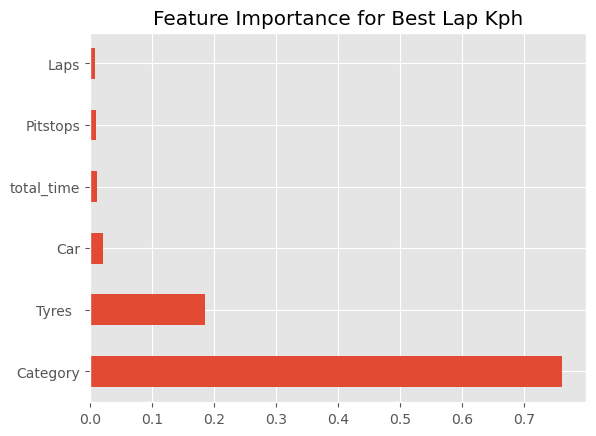

In [75]:
etr = ExtraTreesRegressor()

etr.fit(X,Y)

feat_imp = pd.Series(etr.feature_importances_,index=X.columns)
feat_imp.nlargest(6).plot(kind='barh')
plt.title('Feature Importance for Best Lap Kph')
plt.show()

# Train test Split

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [77]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

### Linear Regression : Best Lap Kph

In [78]:
# Linear Regression on Best Lap Kph
linr = LinearRegression()

linr.fit(X_train,Y_train)
linr_BestKph_pred = linr.predict(X_test)

In [79]:
# Model Score

linr_BestKph_train_score = linr.score(X_train,Y_train)*100
linr_BestKph_test_score = linr.score(X_test,Y_test)*100
linr_BestKph_r2_score = r2_score(Y_test,linr_BestKph_pred)*100

print('Linear_BestKph Train Score :',linr_BestKph_train_score)
print('--------------------------------------')
print('Linear_BestKph Test Score :',linr_BestKph_test_score)
print('--------------------------------------')
print('Linear_BestKph r2_Score :',linr_BestKph_r2_score)

Linear_BestKph Train Score : 89.66429326034337
--------------------------------------
Linear_BestKph Test Score : 84.30252714784953
--------------------------------------
Linear_BestKph r2_Score : 84.30252714784953


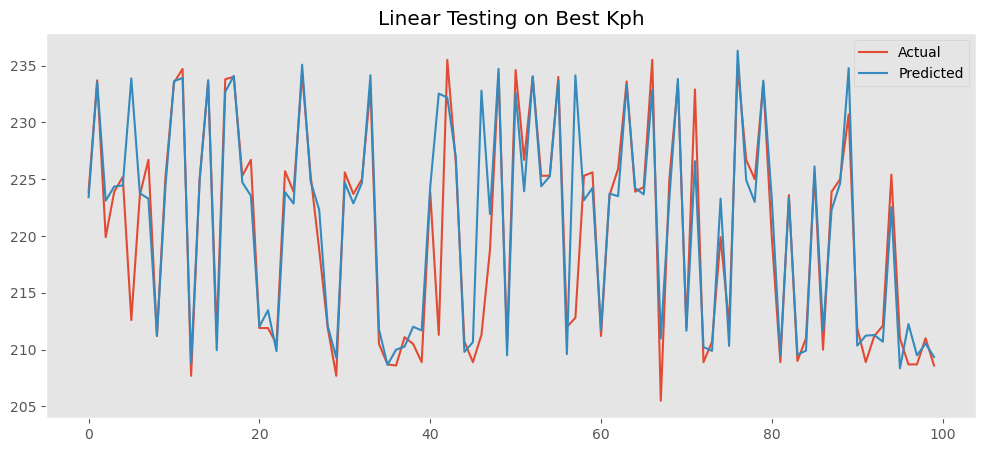

In [80]:
# Let see visualization of Actual and Predicted value of Linear Model

Linear_Best_Kph = pd.DataFrame({'Actual':Y_test,'Predicted':linr_BestKph_pred})

plt.figure(figsize=(12,5))
Linear_Best_Kph = Linear_Best_Kph.reset_index()
Linear_Best_Kph.drop('index',axis=1,inplace=True)

plt.plot(Linear_Best_Kph[:100])
plt.legend(['Actual','Predicted'])
plt.title('Linear Testing on Best Kph')
plt.grid(False)

plt.show()

In [81]:
print('MSE :',mean_squared_error(Y_test,linr_BestKph_pred))

MSE : 14.402253117187744


### DecisionTree Regressor : Best Lap Kph

In [82]:
# DecisionTree Regressor on Best Lap Kph

dtr = DecisionTreeRegressor()

dtr.fit(X_train,Y_train)
dtr_BestKph_pred = dtr.predict(X_test)

In [83]:
# Model Score

dtr_BestKph_train_score = dtr.score(X_train,Y_train)*100
dtr_BestKph_test_score = dtr.score(X_test,Y_test)*100
dtr_BestKph_r2_score = r2_score(Y_test,dtr_BestKph_pred)*100

print('DecisionTree_BestKph Train Score :',dtr_BestKph_train_score)
print('--------------------------------------')
print('DecisionTree_BestKph Test Score :',dtr_BestKph_test_score)
print('--------------------------------------')
print('DecisionTree_BestKph r2_Score :',dtr_BestKph_r2_score)

DecisionTree_BestKph Train Score : 99.99994606210862
--------------------------------------
DecisionTree_BestKph Test Score : 97.12861702416323
--------------------------------------
DecisionTree_BestKph r2_Score : 97.12861702416323


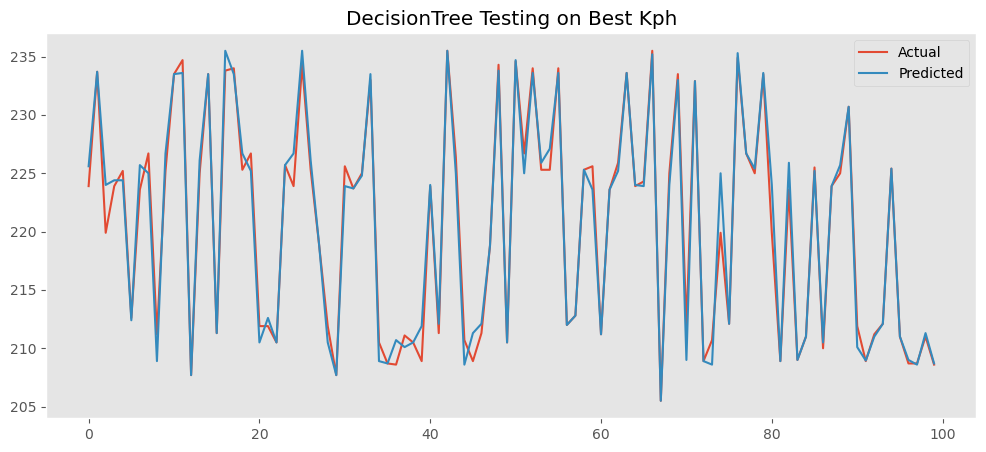

In [84]:
# Let see visualization of Actual and Predicted value of DecisonTree Model

DecisonTree_Best_Kph = pd.DataFrame({'Actual':Y_test,'Predicted':dtr_BestKph_pred})

plt.figure(figsize=(12,5))
DecisonTree_Best_Kph = DecisonTree_Best_Kph.reset_index()
DecisonTree_Best_Kph.drop('index',axis=1,inplace=True)

plt.plot(DecisonTree_Best_Kph[:100])
plt.legend(['Actual','Predicted'])
plt.title('DecisionTree Testing on Best Kph')
plt.grid(False)

plt.show()

In [85]:
print('MSE :',mean_squared_error(Y_test,dtr_BestKph_pred))

MSE : 2.6344612794612745


### RandomForset Regressor : Best Lap Kph

In [86]:
# RandomForest Regressor on Best Lap Kph

rfr = RandomForestRegressor()

rfr.fit(X_train,Y_train)
rfr_BestKph_pred = rfr.predict(X_test)

In [87]:
# Model Score

rfr_BestKph_train_score = rfr.score(X_train,Y_train)*100
rfr_BestKph_test_score = rfr.score(X_test,Y_test)*100
rfr_BestKph_r2_score = r2_score(Y_test,rfr_BestKph_pred)*100

print('RandomForest_BestKph Train Score :',rfr_BestKph_train_score)
print('--------------------------------------')
print('RandomForest_BestKph Test Score :',rfr_BestKph_test_score)
print('--------------------------------------')
print('RandomForest_BestKph r2_Score :',rfr_BestKph_r2_score)

RandomForest_BestKph Train Score : 99.84008632720555
--------------------------------------
RandomForest_BestKph Test Score : 97.6682873424807
--------------------------------------
RandomForest_BestKph r2_Score : 97.6682873424807


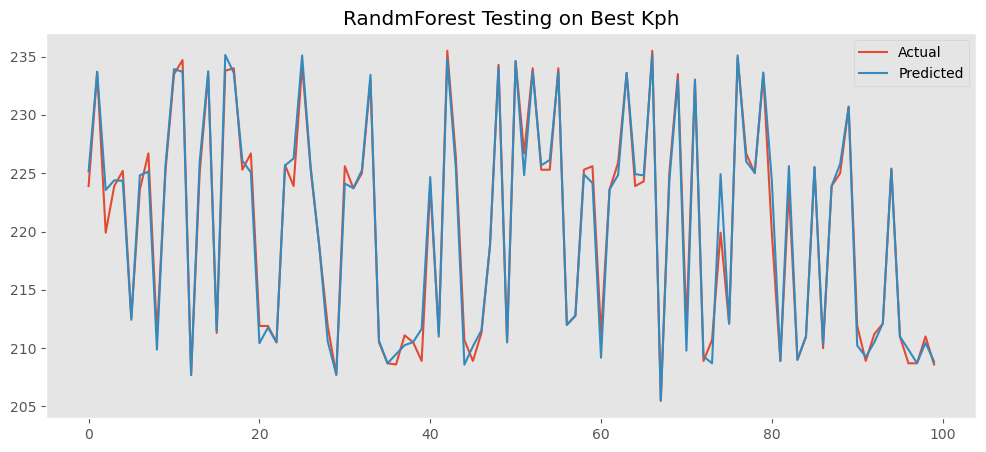

In [88]:
# Let see visualization of Actual and Predicted value of RandmForest Model

RandomForest_Best_Kph = pd.DataFrame({'Actual':Y_test,'Predicted':rfr_BestKph_pred})

plt.figure(figsize=(12,5))
RandomForest_Best_Kph = RandomForest_Best_Kph.reset_index()
RandomForest_Best_Kph.drop('index',axis=1,inplace=True)

plt.plot(RandomForest_Best_Kph[:100])
plt.legend(['Actual','Predicted'])
plt.title('RandmForest Testing on Best Kph')
plt.grid(False)

plt.show()

In [89]:
print('MSE :',mean_squared_error(Y_test,rfr_BestKph_pred))

MSE : 2.1393198896689247


### GradientBoosting Regressor : Best Lap Kph

In [90]:
# GradientBoosting Regressor on Best Lap Kph

gbr = GradientBoostingRegressor()

gbr.fit(X_train,Y_train)
gbr_BestKph_pred = gbr.predict(X_test)

In [91]:
# Model Score

gbr_BestKph_train_score = gbr.score(X_train,Y_train)*100
gbr_BestKph_test_score = gbr.score(X_test,Y_test)*100
gbr_BestKph_r2_score = r2_score(Y_test,gbr_BestKph_pred)*100

print('GradientBoost_BestKph Train Score :',gbr_BestKph_train_score)
print('--------------------------------------')
print('GradientBoost_BestKph Test Score :',gbr_BestKph_test_score)
print('--------------------------------------')
print('GradientBoost_BestKph r2_Score :',gbr_BestKph_r2_score)

GradientBoost_BestKph Train Score : 99.2227506989902
--------------------------------------
GradientBoost_BestKph Test Score : 97.89888643124313
--------------------------------------
GradientBoost_BestKph r2_Score : 97.89888643124313


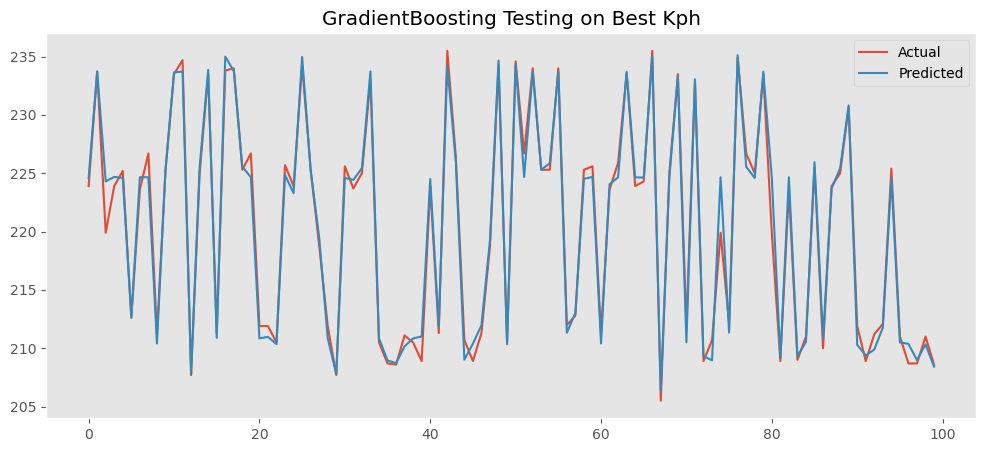

In [92]:
# Let see visualization of Actual and Predicted value of GradientBoost Model

GradientBoost_Best_Kph = pd.DataFrame({'Actual':Y_test,'Predicted':gbr_BestKph_pred})

plt.figure(figsize=(12,5))
GradientBoost_Best_Kph = GradientBoost_Best_Kph.reset_index()
GradientBoost_Best_Kph.drop('index',axis=1,inplace=True)

plt.plot(GradientBoost_Best_Kph[:100])
plt.legend(['Actual','Predicted'])
plt.title('GradientBoosting Testing on Best Kph')
plt.grid(False)

plt.show()

In [93]:
print('MSE :',mean_squared_error(Y_test,gbr_BestKph_pred))

MSE : 1.9277478438861348


### Kneighbors Regressor : Best Lap Kph

In [94]:
# KNeighbors Regressor on Best Lap Kph

knr = KNeighborsRegressor()

knr.fit(X_train,Y_train)
knr_BestKph_pred = knr.predict(X_test)

In [95]:
# Model Score

knr_BestKph_train_score = knr.score(X_train,Y_train)*100
knr_BestKph_test_score = knr.score(X_test,Y_test)*100
knr_BestKph_r2_score = r2_score(Y_test,knr_BestKph_pred)*100

print('KNeighbors_BestKph Train Score :',knr_BestKph_train_score)
print('--------------------------------------')
print('KNeighbors_BestKph Test Score :',knr_BestKph_test_score)
print('--------------------------------------')
print('KNeighbors_BestKph r2_Score :',knr_BestKph_r2_score)

KNeighbors_BestKph Train Score : 98.67211491832015
--------------------------------------
KNeighbors_BestKph Test Score : 96.81179772001636
--------------------------------------
KNeighbors_BestKph r2_Score : 96.81179772001636


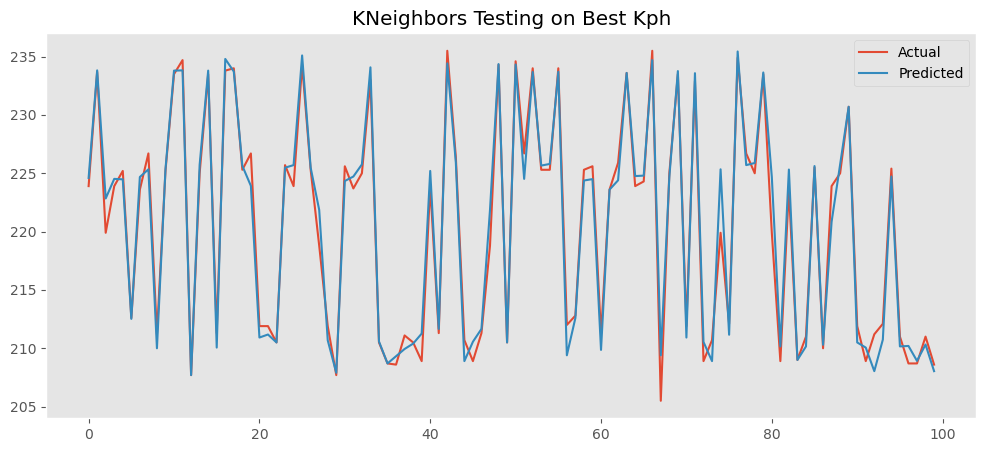

In [96]:
# Let see visualization of Actual and Predicted value of KNeighbors Model

KNeighbors_Best_Kph = pd.DataFrame({'Actual':Y_test,'Predicted':knr_BestKph_pred})

plt.figure(figsize=(12,5))
KNeighbors_Best_Kph = KNeighbors_Best_Kph.reset_index()
KNeighbors_Best_Kph.drop('index',axis=1,inplace=True)

plt.plot(KNeighbors_Best_Kph[:100])
plt.legend(['Actual','Predicted'])
plt.title('KNeighbors Testing on Best Kph')
plt.grid(False)

plt.show()

In [97]:
print('MSE :',mean_squared_error(Y_test,knr_BestKph_pred))

MSE : 2.9251393939393893


### SupportVector Regressor : Best Lap Kph

In [98]:
# Support Vector Regressor on Best Lap Kph
svr = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)

svr.fit(X_train,Y_train)
svr_BestKph_pred = svr.predict(X_test)

In [99]:
# Model Score

svr_BestKph_train_score = svr.score(X_train,Y_train)*100
svr_BestKph_test_score = svr.score(X_test,Y_test)*100
svr_BestKph_r2_score = r2_score(Y_test,svr_BestKph_pred)*100

print('Support Vector_BestKph Train Score :',svr_BestKph_train_score)
print('--------------------------------------')
print('Support Vector_BestKph Test Score :',svr_BestKph_test_score)
print('--------------------------------------')
print('Support Vector_BestKph r2_Score :',svr_BestKph_r2_score)

Support Vector_BestKph Train Score : 96.96016779782384
--------------------------------------
Support Vector_BestKph Test Score : 96.12432742537183
--------------------------------------
Support Vector_BestKph r2_Score : 96.12432742537183


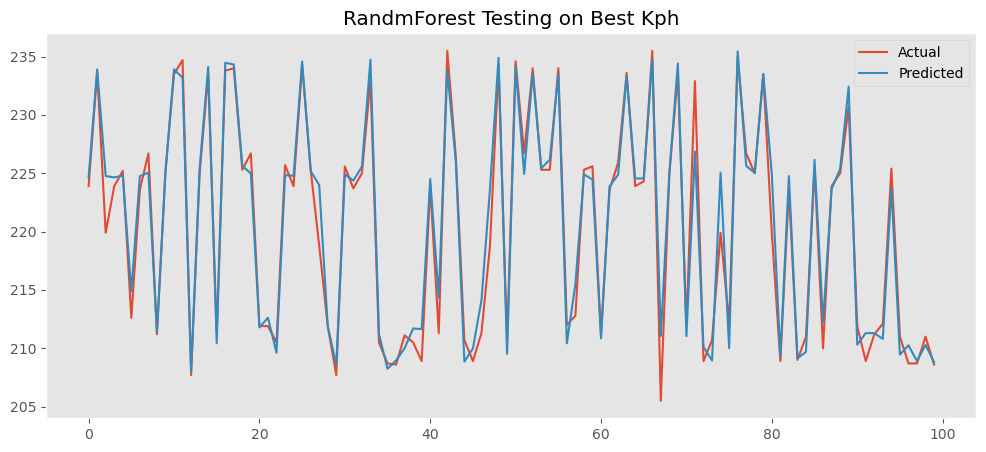

In [100]:
# Let see visualization of Actual and Predicted value of SupportVector Model

SupportVector_Best_Kph = pd.DataFrame({'Actual':Y_test,'Predicted':svr_BestKph_pred})

plt.figure(figsize=(12,5))
SupportVector_Best_Kph = SupportVector_Best_Kph.reset_index()
SupportVector_Best_Kph.drop('index',axis=1,inplace=True)

plt.plot(SupportVector_Best_Kph[:100])
plt.legend(['Actual','Predicted'])
plt.title('RandmForest Testing on Best Kph')
plt.grid(False)

plt.show()

In [101]:
print('MSE :',mean_squared_error(Y_test,svr_BestKph_pred))

MSE : 3.5558855839327492


# Model Performances

In [102]:
BestKph_score = pd.DataFrame({'Model_Name':['Linear Regression','DecisionTree','RandomForest',
                                           'GradientBoost','KNeighbrors','Support Vector'],
                              'Accuracy':[linr_BestKph_r2_score,dtr_BestKph_r2_score,
                                          rfr_BestKph_r2_score,gbr_BestKph_r2_score,
                                          knr_BestKph_r2_score,svr_BestKph_r2_score]})

BestKph_score

,Model_Name,Accuracy
0,Linear Regression,84.302527
1,DecisionTree,97.128617
2,RandomForest,97.668287
3,GradientBoost,97.898886
4,KNeighbrors,96.811798
5,Support Vector,96.124327


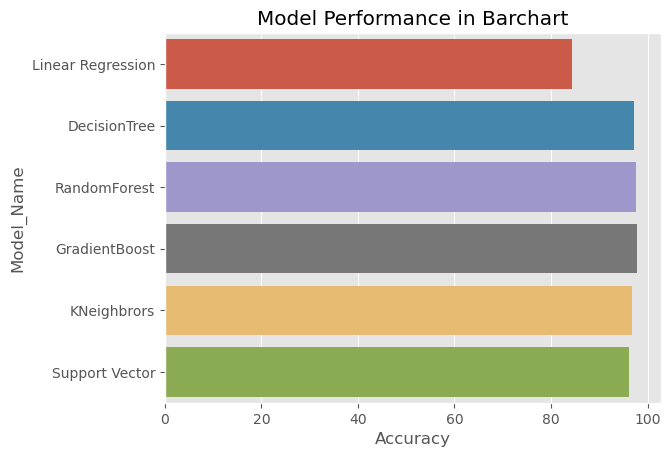

In [103]:
sn.barplot(data=BestKph_score,x='Accuracy',y='Model_Name')
plt.title('Model Performance in Barchart')
plt.show()

In [104]:
pd.DataFrame({'Actual':Y_test,'Predicted':gbr_BestKph_pred})

,Actual,Predicted
202,223.9,224.566289
391,233.7,233.741270
92,219.9,224.305518
632,223.9,224.683893
767,225.2,224.605822
...,...,...
1195,225.7,225.560055
1122,236.5,235.467069
12,225.9,224.090838
928,223.9,223.690105


#### Almost matching

# Best Lap Time Prediction

In [105]:
x_ = le_man[['Hour','Car','Category','Laps','Pitstops','Best Lap Kph','total_time']]
x_.head(5)

,Hour,Car,Category,Laps,Pitstops,Best Lap Kph,total_time
0,1,11,0,12,0,234.0,3675.0
1,1,5,0,12,0,234.6,3679.0
2,1,11,0,12,0,233.6,3681.0
3,1,10,0,12,0,233.7,3682.0
4,1,10,0,12,0,233.6,3683.0


In [106]:
y_ = le_man['Lap_record']
y_.head(5)

0    209.7
1    209.1
2    210.0
3    209.9
4    210.0
Name: Lap_record, dtype: float64

## Feature Importance : Best Lap Time

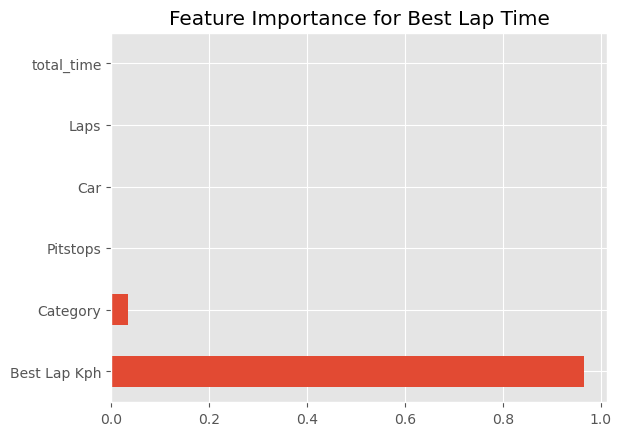

In [107]:
rfr = RandomForestRegressor()

rfr.fit(x_,y_)

feat_imp = pd.Series(rfr.feature_importances_,index=x_.columns)
feat_imp.nlargest(6).plot(kind='barh')
plt.title('Feature Importance for Best Lap Time')
plt.show()

# Train Test Split : Best Lap Time

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x_,y_,test_size=0.2,random_state=9)

In [109]:
print('x_train shape :',x_train.shape)
print('x_test shape  :' ,x_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape  :',y_test.shape)

x_train shape : (1186, 7)
x_test shape  : (297, 7)
y_train shape : (1186,)
y_test shape  : (297,)


In [110]:
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Model Building

### Linear Regression : Best Lap Time

In [111]:
linr  = LinearRegression()

linr.fit(x_train,y_train)

linr_lap_time_pred = linr.predict(x_test)

In [112]:
linr_laptime_train = linr.score(x_train,y_train)*100
linr_laptime_test = linr.score(x_test,y_test)*100
linr_laptime_r2_score = r2_score(y_test,linr_lap_time_pred)*100

print('Linear LapTime Train Score :',linr_laptime_train)
print('---------------------------------------------------')
print('Linear LapTime Test Score :',linr_laptime_test)
print('---------------------------------------------------')
print('Linear LapTime r2_Score :',linr_laptime_r2_score)

Linear LapTime Train Score : 99.97744874311117
---------------------------------------------------
Linear LapTime Test Score : 99.97240443090497
---------------------------------------------------
Linear LapTime r2_Score : 99.97240443090497


In [113]:
print('MAE :',mean_absolute_error(y_test,linr_lap_time_pred))
print('---------------------------------')
print('MSE :',mean_squared_error(y_test,linr_lap_time_pred))
print('---------------------------------')
print('RMSE :',np.sqrt(mean_squared_error(y_test,linr_lap_time_pred)))

MAE : 0.11215493314420948
---------------------------------
MSE : 0.027737221156525847
---------------------------------
RMSE : 0.16654495235979339


### Ridge Regression : Best Lap Time

In [114]:
# Ridge Regression on Bestlap Time

l2 = Ridge(alpha=1.0)
l2.fit(x_train, y_train)
ridge_laptime_pred = l2.predict(x_test)

mae_ridge = mean_absolute_error(y_test, ridge_laptime_pred)
mse_ridge = mean_squared_error(y_test, ridge_laptime_pred)

print("Ridge MSE:", mse_ridge)
print('----------------------------------')
print("Ridge MAE:", mae_ridge)
print('----------------------------------')
print('Ridge r2_score      :',r2_score(y_test,ridge_laptime_pred)*100)

Ridge MSE: 0.05287325069273973
----------------------------------
Ridge MAE: 0.16092656311045503
----------------------------------
Ridge r2_score      : 99.94739676932535


### Lasso Regression : Best Lap Time

In [115]:
# Lasso Regression on Bestlap Time

l1 = Lasso(alpha=1.0)
l1.fit(x_train, y_train)
lasso_laptime_pred = l1.predict(x_test)

mae_lasso = mean_absolute_error(y_test, lasso_laptime_pred)
mse_lasso = mean_squared_error(y_test, lasso_laptime_pred)

print("Lasso MSE:", mse_lasso)
print('----------------------------------')
print("Lasso MAE:", mae_lasso)
print('----------------------------------')
print('Lasso r2_score      :',r2_score(y_test,lasso_laptime_pred)*100)

Lasso MSE: 12.544778144896474
----------------------------------
Lasso MAE: 3.223764922713217
----------------------------------
Lasso r2_score      : 87.51928716558217


In [117]:
pd.DataFrame({'Actual':y_test,'Predicted':linr_lap_time_pred})

,Actual,Predicted
629,210.1,210.144559
338,217.6,217.576825
515,217.3,217.274672
955,209.8,209.889411
1454,233.6,233.645968
...,...,...
638,219.3,219.435878
224,233.1,233.066299
112,235.1,235.038317
852,212.6,213.021224


## Conclusion

With the help of Machine Learning Algorithms we have completed our task
All 3 Predictions got Best Model with Great Accuracy and Less MSE Scores 

1. Total Time Prediction
- RandomForest Regressor Performing Best with less Mse score
- Accuracy           = 95%
- Mean_squared_error = less than 0.

2. Best Lap Kph Prediction
- Gradient Boosting Regressor Performing Best with less Mse score
- Accuracy           = 97%
- Mean_squared_error = upto 1.

3. Best LapTime Prediction
- Linear Regression and also Ridge is performing Good with Accuracy as well as MSE score
- Accuracy = 99%
- MSE = 0.05